In [ ]:
import functions
import pandas as pd
import numpy as np

# Preprocessing

In [ ]:
df = pd.read_csv("original_data.csv")

In [ ]:
from sklearn.model_selection import train_test_split

df_all_train, df_test = train_test_split(df, test_size=0.2, random_state=0, stratify = df["genre"])

In [ ]:
df_train, df_val = train_test_split(df_all_train, test_size=0.2, random_state=0, stratify = df_all_train["genre"])

In [ ]:
len(df_train)

34560

In [ ]:
df_train, x_train = functions.preprocessing(df=df_train, remove_useless_sentences = True, tokenize=True, remove_one_characters=True, lemmatize=True, remove_stop_words=True)

In [ ]:
len(df_train)

34560

In [ ]:
df_val, x_val = functions.preprocessing(df=df_val, remove_useless_sentences = True, tokenize=True, remove_one_characters=True, lemmatize=True, remove_stop_words=True)

In [ ]:
y_train = functions.target_variable(df_train, "genre")
y_val = functions.target_variable(df_val, "genre")

In [ ]:
#prints for the choice of the padding size
list_lengths = [len(sublist) for sublist in x_train]

#average length
average_length = sum(list_lengths) / len(list_lengths)

print("Average Length of Lists in x_train:", average_length)

#maximum length
max_length = max(list_lengths)

print("Maximum Length of Lists in x_train:", max_length)

#longer than 30
count_longer_than_30 = sum(1 for sublist in x_train if len(sublist) > 30)

print("Number of lists longer than 30 in x_train:", count_longer_than_30)

Average Length of Lists in x_train: 14.11171875
Maximum Length of Lists in x_train: 43
Number of lists longer than 30 in x_train: 46


In [ ]:
padded_train, padded_val, tokenizer = functions.tokenizer_padding(x_train=x_train, max_length=30, x_test=x_val)

In [ ]:
import itertools

flattened_x_train = list(itertools.chain.from_iterable(padded_train))

zeros = 0
others = 0
for el in flattened_x_train:
    if (el==0):
        zeros+=1
    else:
        others+=1
print(f"zeros: {zeros} and others: {others}")
percentage = zeros/(zeros+others)
print(f"percentage of zero: {percentage}")

zeros: 549254 and others: 487546
percentage of zero: 0.5297588734567901


In [ ]:
flattened_x_val = list(itertools.chain.from_iterable(padded_val))

zeros = 0
others = 0
for el in flattened_x_val:
    if (el==0):
        zeros+=1
    else:
        others+=1
print(f"zeros: {zeros} and others: {others}")
percentage = zeros/(zeros+others)
print(f"percentage of zero: {percentage}")

zeros: 142159 and others: 117041
percentage of zero: 0.5484529320987654


# LSTM with word2vec

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [ ]:
from gensim.models import Word2Vec
word_2_vec_learner = Word2Vec(sentences = x_train, vector_size = 100, window = 5, min_count = 1, workers = 4, sg =1)

In [ ]:
#words close to murder
murder = word_2_vec_learner.wv.most_similar("murder")
murder

[('killing', 0.7435916066169739),
 ('suicide', 0.743453860282898),
 ('kidnapping', 0.739416241645813),
 ('crime', 0.7281360030174255),
 ('falsely', 0.7106314301490784),
 ('committed', 0.7053932547569275),
 ('wrongly', 0.7017213702201843),
 ('disappearance', 0.6983948349952698),
 ('innocence', 0.6958107948303223),
 ('murdering', 0.6953843235969543)]

In [ ]:
from keras.preprocessing.text import Tokenizer

vocab_size = len(tokenizer.word_index)

embedding_matrix = np.zeros((vocab_size + 1, 100))  #100 is the vector_size

for word, i in tokenizer.word_index.items():
    if word in word_2_vec_learner.wv:
        embedding_matrix[i] = word_2_vec_learner.wv[word]

Testing with hyperparameters: {'lstm_units': 100, 'learning_rate': 5e-05, 'batch_size': 32, 'dropout': 0.5, 'recurrent_dropout': 0.4}
Epoch 1/15
1080/1080 [==============================] - 19s 17ms/step - loss: 2.2043 - accuracy: 0.1755 - val_loss: 2.0705 - val_accuracy: 0.2417 - lr: 5.0000e-05
Epoch 2/15
1080/1080 [==============================] - 18s 16ms/step - loss: 2.0906 - accuracy: 0.2342 - val_loss: 2.0309 - val_accuracy: 0.2579 - lr: 5.0000e-05
Epoch 3/15
1080/1080 [==============================] - 18s 16ms/step - loss: 2.0489 - accuracy: 0.2520 - val_loss: 1.9584 - val_accuracy: 0.2900 - lr: 5.0000e-05
Epoch 4/15
1080/1080 [==============================] - 18s 17ms/step - loss: 1.9963 - accuracy: 0.2740 - val_loss: 1.9216 - val_accuracy: 0.3043 - lr: 5.0000e-05
Epoch 5/15
1080/1080 [==============================] - 18s 17ms/step - loss: 1.9743 - accuracy: 0.2815 - val_loss: 1.9063 - val_accuracy: 0.3108 - lr: 5.0000e-05
Epoch 6/15
1080/1080 [=============================

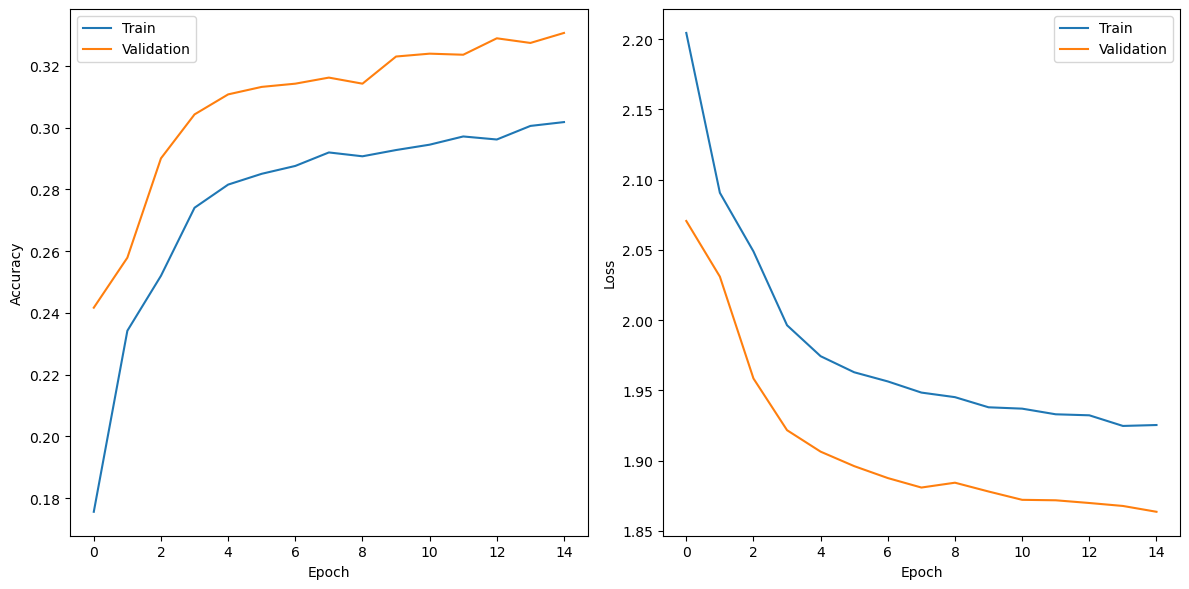

Testing with hyperparameters: {'lstm_units': 50, 'learning_rate': 1e-05, 'batch_size': 8, 'dropout': 0.4, 'recurrent_dropout': 0.2}
Epoch 1/15
4320/4320 [==============================] - 44s 10ms/step - loss: 2.3003 - accuracy: 0.1316 - val_loss: 2.2952 - val_accuracy: 0.1959 - lr: 1.0000e-05
Epoch 2/15
4320/4320 [==============================] - 44s 10ms/step - loss: 2.2503 - accuracy: 0.1659 - val_loss: 2.1865 - val_accuracy: 0.1802 - lr: 1.0000e-05
Epoch 3/15
4320/4320 [==============================] - 43s 10ms/step - loss: 2.1856 - accuracy: 0.1790 - val_loss: 2.1405 - val_accuracy: 0.2019 - lr: 1.0000e-05
Epoch 4/15
4320/4320 [==============================] - 43s 10ms/step - loss: 2.1498 - accuracy: 0.1964 - val_loss: 2.1027 - val_accuracy: 0.2098 - lr: 1.0000e-05
Epoch 5/15
4320/4320 [==============================] - 43s 10ms/step - loss: 2.1218 - accuracy: 0.2064 - val_loss: 2.0741 - val_accuracy: 0.2236 - lr: 1.0000e-05
Epoch 6/15
4320/4320 [==============================]

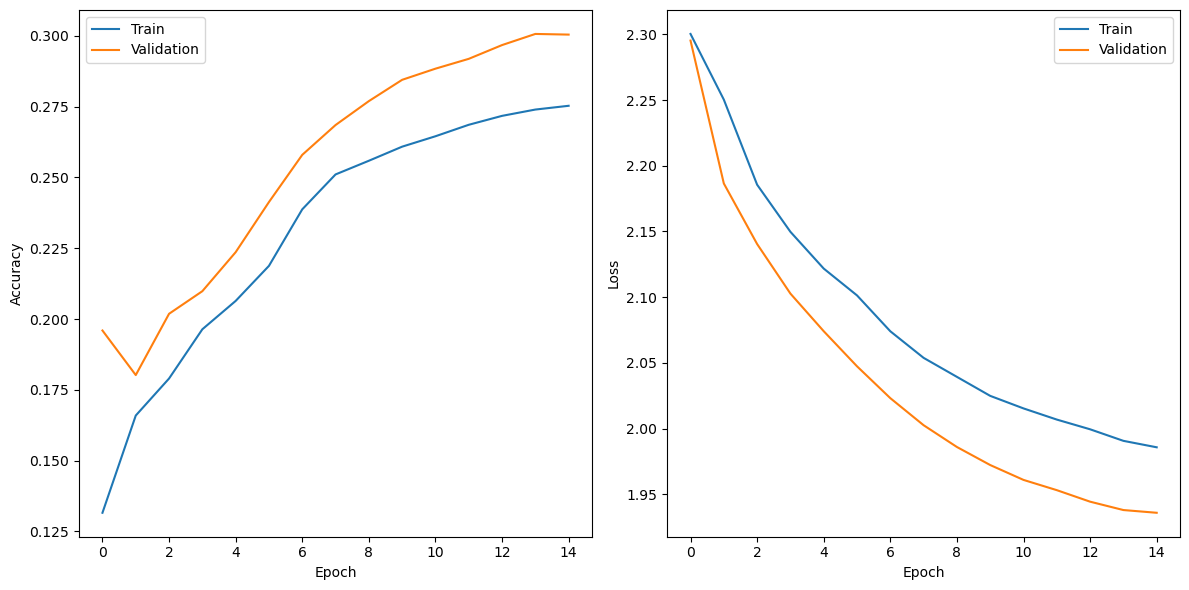

Testing with hyperparameters: {'lstm_units': 150, 'learning_rate': 0.001, 'batch_size': 8, 'dropout': 0.2, 'recurrent_dropout': 0.3}
Epoch 1/15
4320/4320 [==============================] - 81s 18ms/step - loss: 2.0200 - accuracy: 0.2656 - val_loss: 1.9167 - val_accuracy: 0.3093 - lr: 0.0010
Epoch 2/15
4320/4320 [==============================] - 78s 18ms/step - loss: 1.9036 - accuracy: 0.3176 - val_loss: 1.8620 - val_accuracy: 0.3361 - lr: 0.0010
Epoch 3/15
4320/4320 [==============================] - 78s 18ms/step - loss: 1.8548 - accuracy: 0.3375 - val_loss: 1.8122 - val_accuracy: 0.3544 - lr: 0.0010
Epoch 4/15
4320/4320 [==============================] - 77s 18ms/step - loss: 1.8192 - accuracy: 0.3494 - val_loss: 1.7859 - val_accuracy: 0.3644 - lr: 0.0010
Epoch 5/15
4320/4320 [==============================] - 77s 18ms/step - loss: 1.7968 - accuracy: 0.3554 - val_loss: 1.7890 - val_accuracy: 0.3631 - lr: 0.0010
Epoch 6/15
4320/4320 [==============================] - 78s 18ms/step - 

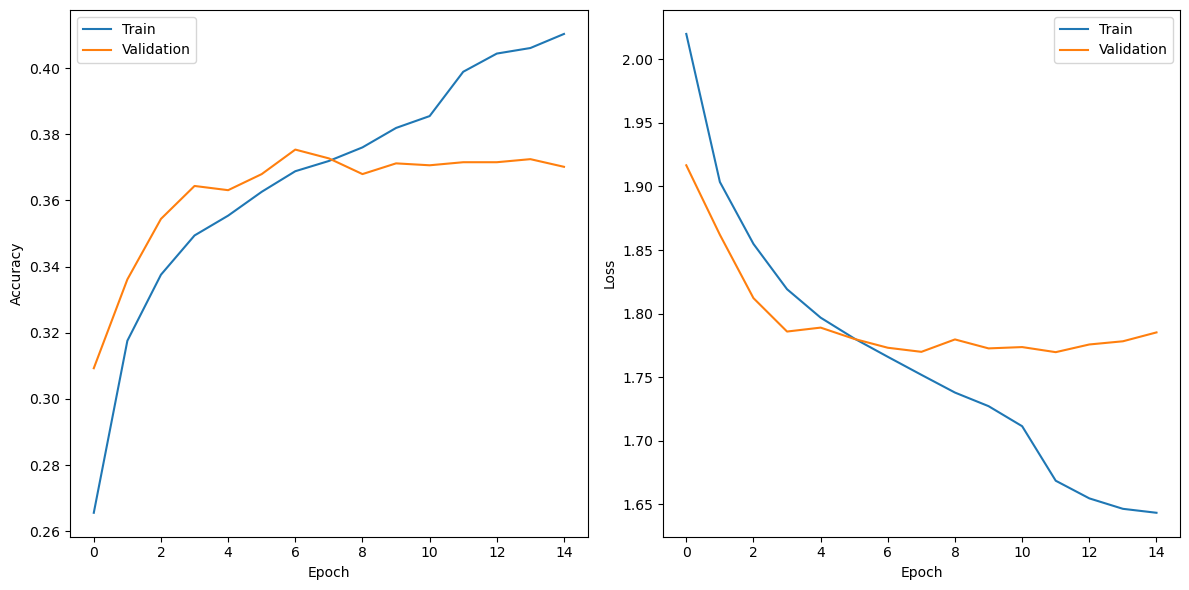

Testing with hyperparameters: {'lstm_units': 25, 'learning_rate': 1e-05, 'batch_size': 32, 'dropout': 0.5, 'recurrent_dropout': 0.5}
Epoch 1/15
1080/1080 [==============================] - 9s 8ms/step - loss: 2.3037 - accuracy: 0.0882 - val_loss: 2.3031 - val_accuracy: 0.0897 - lr: 1.0000e-05
Epoch 2/15
1080/1080 [==============================] - 8s 7ms/step - loss: 2.3031 - accuracy: 0.0920 - val_loss: 2.3025 - val_accuracy: 0.0995 - lr: 1.0000e-05
Epoch 3/15
1080/1080 [==============================] - 8s 7ms/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 2.3021 - val_accuracy: 0.1037 - lr: 1.0000e-05
Epoch 4/15
1080/1080 [==============================] - 8s 7ms/step - loss: 2.3020 - accuracy: 0.1067 - val_loss: 2.3016 - val_accuracy: 0.1123 - lr: 1.0000e-05
Epoch 5/15
1080/1080 [==============================] - 8s 7ms/step - loss: 2.3016 - accuracy: 0.1105 - val_loss: 2.3010 - val_accuracy: 0.1235 - lr: 1.0000e-05
Epoch 6/15
1080/1080 [==============================] - 8s 7ms

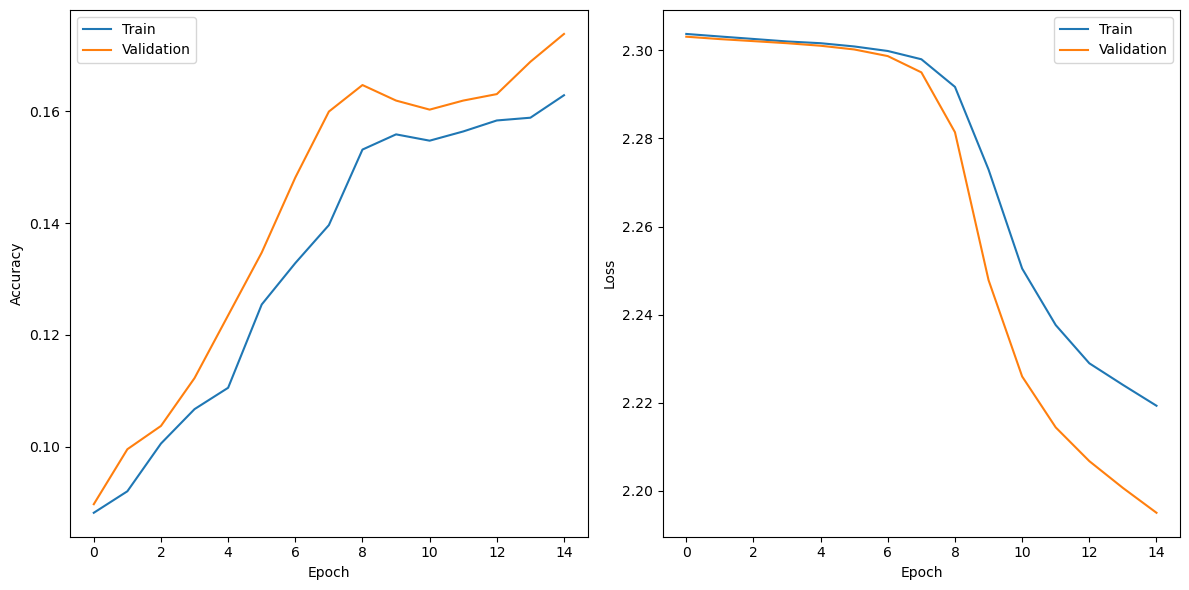

Testing with hyperparameters: {'lstm_units': 25, 'learning_rate': 0.0005, 'batch_size': 8, 'dropout': 0.5, 'recurrent_dropout': 0.2}
Epoch 1/15
4320/4320 [==============================] - 42s 9ms/step - loss: 2.0879 - accuracy: 0.2303 - val_loss: 1.9502 - val_accuracy: 0.2934 - lr: 5.0000e-04
Epoch 2/15
4320/4320 [==============================] - 41s 10ms/step - loss: 1.9653 - accuracy: 0.2884 - val_loss: 1.8999 - val_accuracy: 0.3139 - lr: 5.0000e-04
Epoch 3/15
4320/4320 [==============================] - 41s 9ms/step - loss: 1.9337 - accuracy: 0.3010 - val_loss: 1.8815 - val_accuracy: 0.3292 - lr: 5.0000e-04
Epoch 4/15
4320/4320 [==============================] - 41s 9ms/step - loss: 1.9148 - accuracy: 0.3085 - val_loss: 1.8770 - val_accuracy: 0.3285 - lr: 5.0000e-04
Epoch 5/15
4320/4320 [==============================] - 42s 10ms/step - loss: 1.9007 - accuracy: 0.3183 - val_loss: 1.8516 - val_accuracy: 0.3439 - lr: 5.0000e-04
Epoch 6/15
4320/4320 [==============================] -

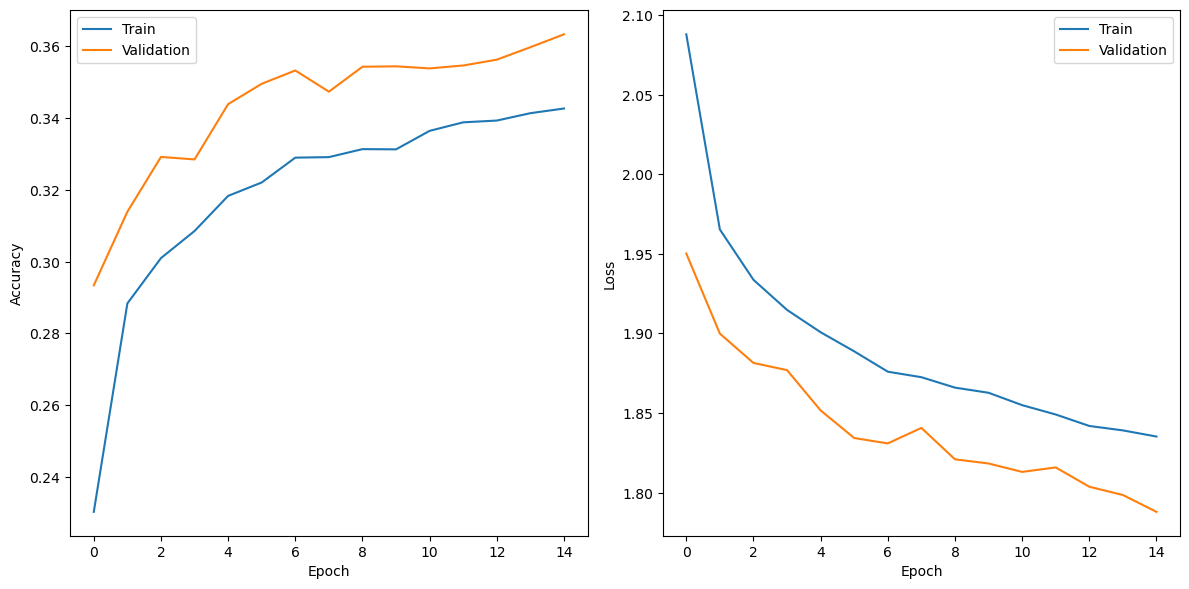

Testing with hyperparameters: {'lstm_units': 100, 'learning_rate': 1e-05, 'batch_size': 4, 'dropout': 0.5, 'recurrent_dropout': 0.3}
Epoch 1/15
8640/8640 [==============================] - 98s 11ms/step - loss: 2.2667 - accuracy: 0.1480 - val_loss: 2.1710 - val_accuracy: 0.1954 - lr: 1.0000e-05
Epoch 2/15
8640/8640 [==============================] - 95s 11ms/step - loss: 2.1407 - accuracy: 0.2003 - val_loss: 2.0721 - val_accuracy: 0.2273 - lr: 1.0000e-05
Epoch 3/15
8640/8640 [==============================] - 95s 11ms/step - loss: 2.0743 - accuracy: 0.2366 - val_loss: 1.9973 - val_accuracy: 0.2822 - lr: 1.0000e-05
Epoch 4/15
8640/8640 [==============================] - 95s 11ms/step - loss: 2.0305 - accuracy: 0.2571 - val_loss: 1.9571 - val_accuracy: 0.2954 - lr: 1.0000e-05
Epoch 5/15
8640/8640 [==============================] - 95s 11ms/step - loss: 2.0039 - accuracy: 0.2686 - val_loss: 1.9369 - val_accuracy: 0.3003 - lr: 1.0000e-05
Epoch 6/15
8640/8640 [==============================

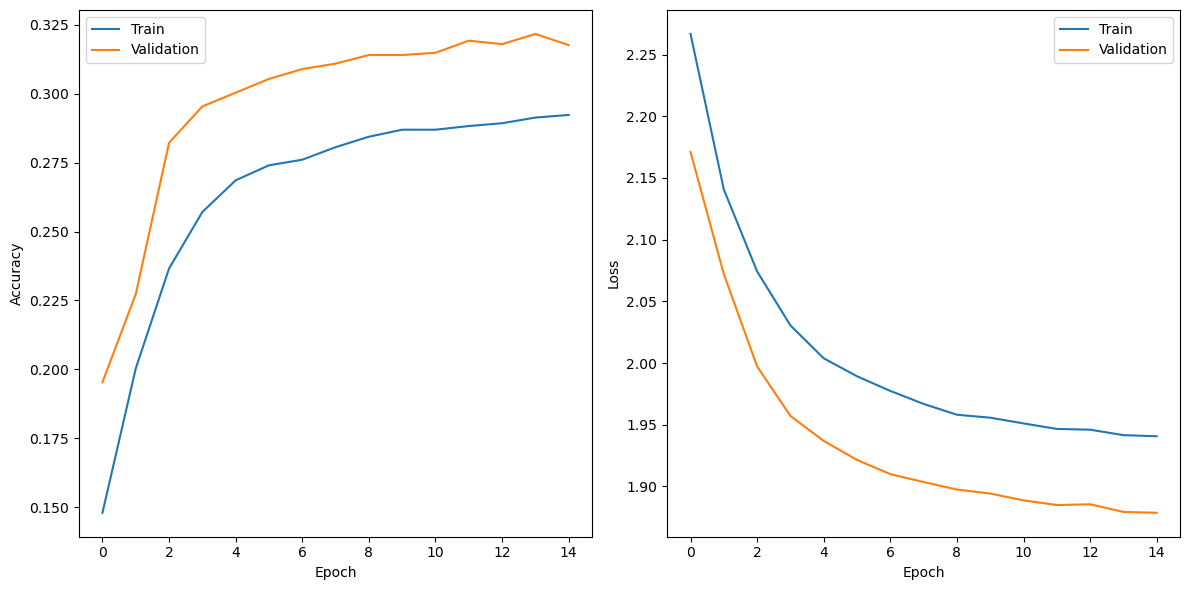

Testing with hyperparameters: {'lstm_units': 100, 'learning_rate': 0.0005, 'batch_size': 16, 'dropout': 0.3, 'recurrent_dropout': 0.5}
Epoch 1/15
2160/2160 [==============================] - 27s 12ms/step - loss: 2.0138 - accuracy: 0.2622 - val_loss: 1.9077 - val_accuracy: 0.3116 - lr: 5.0000e-04
Epoch 2/15
2160/2160 [==============================] - 26s 12ms/step - loss: 1.9332 - accuracy: 0.3036 - val_loss: 1.8795 - val_accuracy: 0.3300 - lr: 5.0000e-04
Epoch 3/15
2160/2160 [==============================] - 25s 12ms/step - loss: 1.9064 - accuracy: 0.3134 - val_loss: 1.8658 - val_accuracy: 0.3370 - lr: 5.0000e-04
Epoch 4/15
2160/2160 [==============================] - 25s 12ms/step - loss: 1.8898 - accuracy: 0.3218 - val_loss: 1.8405 - val_accuracy: 0.3463 - lr: 5.0000e-04
Epoch 5/15
2160/2160 [==============================] - 25s 12ms/step - loss: 1.8655 - accuracy: 0.3363 - val_loss: 1.8439 - val_accuracy: 0.3420 - lr: 5.0000e-04
Epoch 6/15
2160/2160 [============================

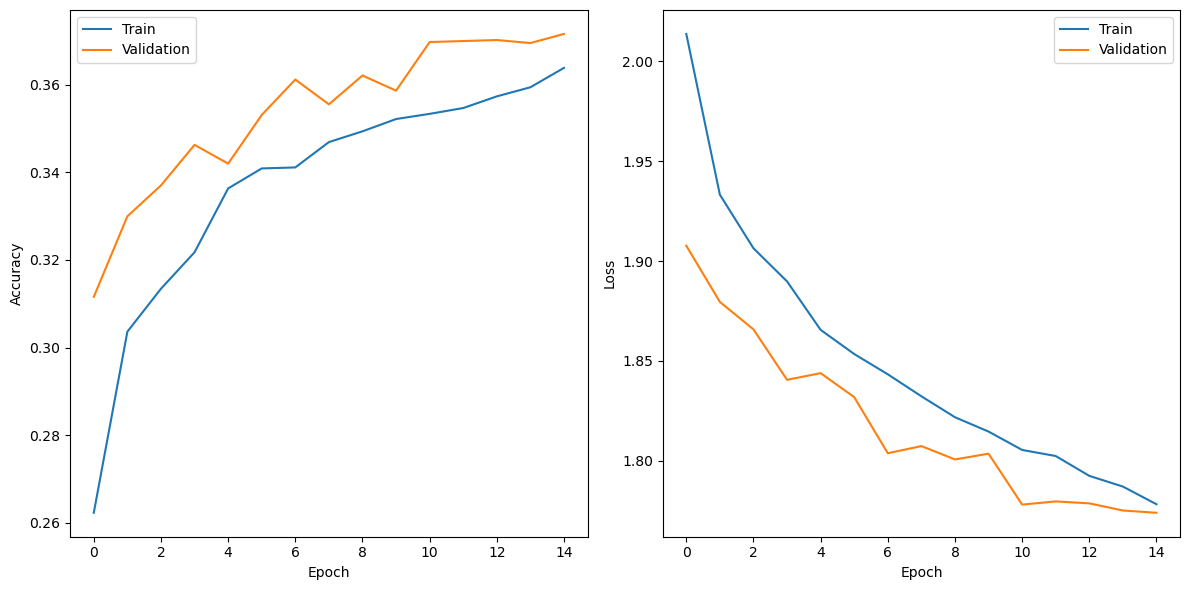

Testing with hyperparameters: {'lstm_units': 100, 'learning_rate': 0.001, 'batch_size': 16, 'dropout': 0.4, 'recurrent_dropout': 0.2}
Epoch 1/15
2160/2160 [==============================] - 30s 13ms/step - loss: 2.0129 - accuracy: 0.2695 - val_loss: 1.8943 - val_accuracy: 0.3198 - lr: 0.0010
Epoch 2/15
2160/2160 [==============================] - 42s 20ms/step - loss: 1.9198 - accuracy: 0.3139 - val_loss: 1.8748 - val_accuracy: 0.3259 - lr: 0.0010
Epoch 3/15
2160/2160 [==============================] - 45s 21ms/step - loss: 1.8831 - accuracy: 0.3277 - val_loss: 1.8444 - val_accuracy: 0.3521 - lr: 0.0010
Epoch 4/15
2160/2160 [==============================] - 56s 26ms/step - loss: 1.8633 - accuracy: 0.3365 - val_loss: 1.8197 - val_accuracy: 0.3558 - lr: 0.0010
Epoch 5/15
2160/2160 [==============================] - 55s 26ms/step - loss: 1.8406 - accuracy: 0.3406 - val_loss: 1.8065 - val_accuracy: 0.3617 - lr: 0.0010
Epoch 6/15
2160/2160 [==============================] - 55s 26ms/step -

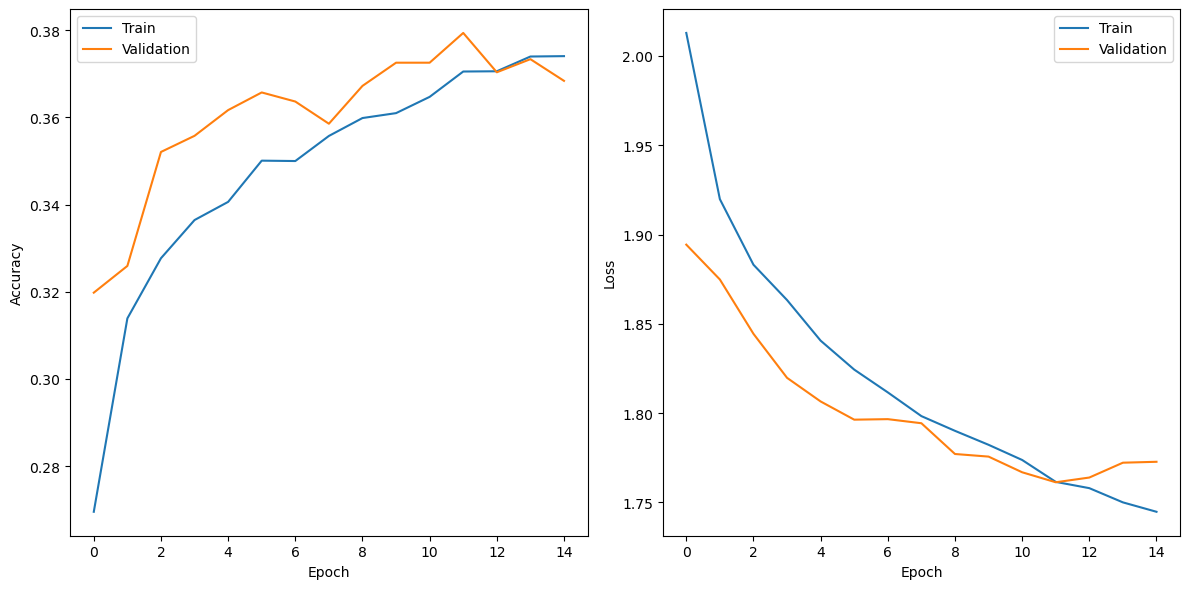

Testing with hyperparameters: {'lstm_units': 50, 'learning_rate': 5e-05, 'batch_size': 32, 'dropout': 0.3, 'recurrent_dropout': 0.3}
Epoch 1/15
1080/1080 [==============================] - 17s 15ms/step - loss: 2.2591 - accuracy: 0.1512 - val_loss: 2.1829 - val_accuracy: 0.1828 - lr: 5.0000e-05
Epoch 2/15
1080/1080 [==============================] - 16s 14ms/step - loss: 2.1461 - accuracy: 0.2127 - val_loss: 2.0895 - val_accuracy: 0.2330 - lr: 5.0000e-05
Epoch 3/15
1080/1080 [==============================] - 16s 15ms/step - loss: 2.1017 - accuracy: 0.2274 - val_loss: 2.0619 - val_accuracy: 0.2451 - lr: 5.0000e-05
Epoch 4/15
1080/1080 [==============================] - 18s 17ms/step - loss: 2.0847 - accuracy: 0.2341 - val_loss: 2.0453 - val_accuracy: 0.2512 - lr: 5.0000e-05
Epoch 5/15
1080/1080 [==============================] - 16s 15ms/step - loss: 2.0700 - accuracy: 0.2455 - val_loss: 2.0319 - val_accuracy: 0.2656 - lr: 5.0000e-05
Epoch 6/15
1080/1080 [==============================

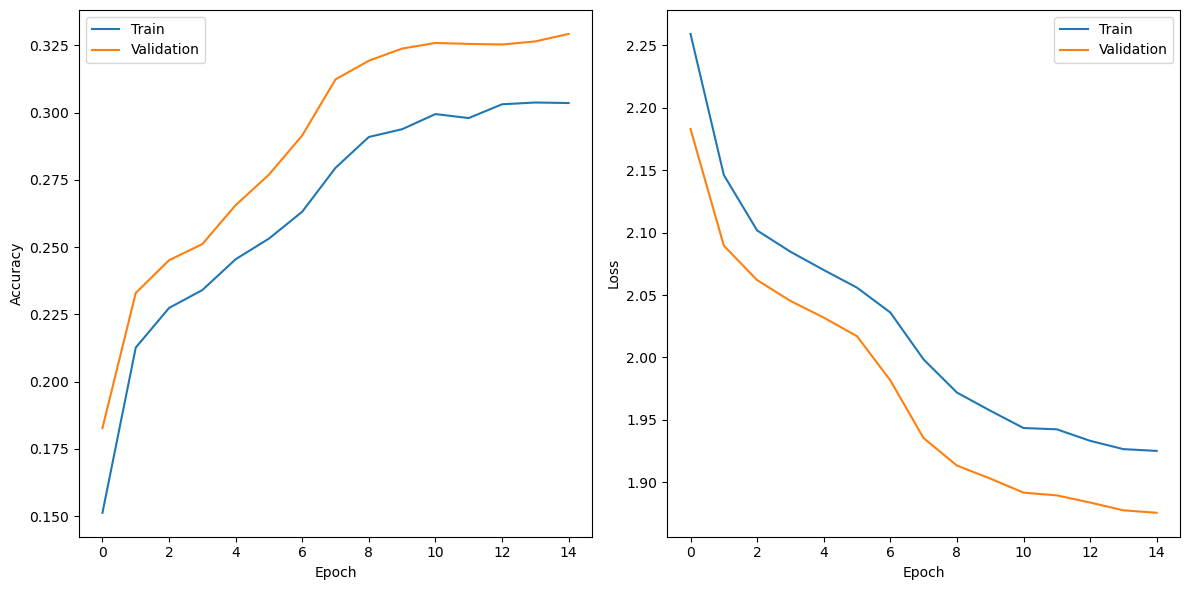

Testing with hyperparameters: {'lstm_units': 100, 'learning_rate': 0.0005, 'batch_size': 32, 'dropout': 0.3, 'recurrent_dropout': 0.5}
Epoch 1/15
1080/1080 [==============================] - 29s 26ms/step - loss: 2.0264 - accuracy: 0.2553 - val_loss: 1.9068 - val_accuracy: 0.3097 - lr: 5.0000e-04
Epoch 2/15
1080/1080 [==============================] - 28s 26ms/step - loss: 1.9306 - accuracy: 0.3032 - val_loss: 1.8673 - val_accuracy: 0.3288 - lr: 5.0000e-04
Epoch 3/15
1080/1080 [==============================] - 28s 26ms/step - loss: 1.8988 - accuracy: 0.3189 - val_loss: 1.8431 - val_accuracy: 0.3444 - lr: 5.0000e-04
Epoch 4/15
1080/1080 [==============================] - 28s 25ms/step - loss: 1.8848 - accuracy: 0.3227 - val_loss: 1.8579 - val_accuracy: 0.3390 - lr: 5.0000e-04
Epoch 5/15
1080/1080 [==============================] - 28s 26ms/step - loss: 1.8735 - accuracy: 0.3288 - val_loss: 1.8215 - val_accuracy: 0.3490 - lr: 5.0000e-04
Epoch 6/15
1080/1080 [============================

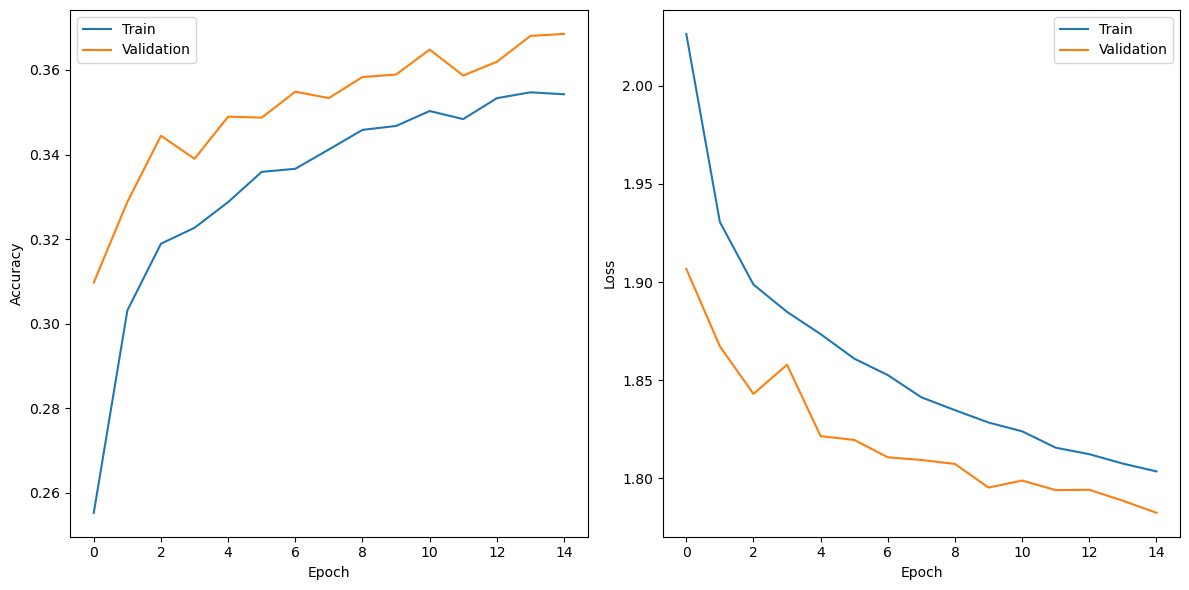


Best Parameters: {'lstm_units': 100, 'learning_rate': 0.001, 'batch_size': 16, 'dropout': 0.4, 'recurrent_dropout': 0.2}
Best Accuracy: 0.3793981373310089


C:\Users\franc\AppData\Local\Temp\ipykernel_7700\2899820696.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(all_results.keys()), rotation=45, ha="right")


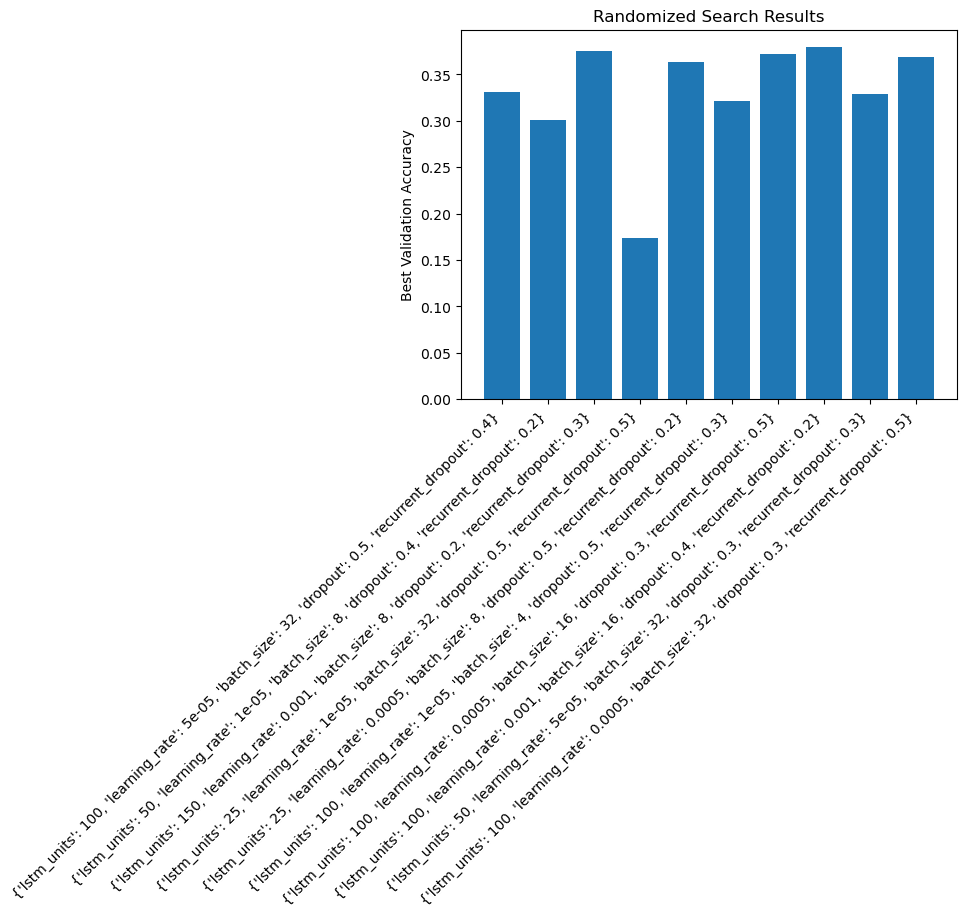

In [ ]:
#a sort of randomized search without cross validation (because the cv takes time)
#plots of accuracy and loss by epochs for the combinations of hyperparameters
import random
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

max_length = 30 #length of the padding

hyperparameters = {
    'lstm_units': [25, 50, 100, 150],
    'learning_rate': [0.00001, 0.00005, 0.0001, 0.0005, 0.001],
    'batch_size' : [4, 8, 16, 32],
    'dropout' : [0.2, 0.3, 0.4, 0.5],
    'recurrent_dropout' : [0.2, 0.3, 0.4, 0.5]
}

number_of_combinations = 10
number_of_epochs = 15

random_combinations = random.sample(list(itertools.product(*hyperparameters.values())), number_of_combinations)


best_params = None
best_accuracy = 0.0
all_results = {}


for combo in random_combinations:
    param_dict = dict(zip(hyperparameters.keys(), combo))
    print("Testing with hyperparameters:", param_dict)

    #embedding and lstm
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size + 1, output_dim=100,  #100 is the vector_size
                        weights=[embedding_matrix],  #embeddings of word2vec
                        input_length=max_length, trainable=False)) #length of the padding
    model.add(LSTM(units=param_dict['lstm_units'], dropout=param_dict['dropout'], recurrent_dropout=param_dict['recurrent_dropout']))
    model.add(Dense(units=10, activation='softmax'))
    optimizer = Adam(learning_rate=param_dict['learning_rate'])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    #eraly stopping and decreasing lr
    early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)


    history = model.fit(padded_train, y_train, validation_data=(padded_val, y_val), epochs=number_of_epochs, batch_size=param_dict['batch_size'], verbose=1, callbacks=[early_stopping], workers = 6)

    #results
    accuracy = max(history.history['val_accuracy'])
    all_results[str(param_dict)] = accuracy

    #update best parameters if the current combination is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = param_dict

 #plot training and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    #plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

#best parameters and results
print("\nBest Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

#accuracy for all combinations
fig, ax = plt.subplots()
ax.bar(all_results.keys(), all_results.values())
ax.set_xticklabels(list(all_results.keys()), rotation=45, ha="right")
ax.set_ylabel('Best Validation Accuracy')
ax.set_title('Randomized Search Results')
plt.show()

## Test

In [ ]:
df_all_train, x_all_train = functions.preprocessing(df=df_all_train, remove_useless_sentences = True, tokenize=True, remove_one_characters=True, lemmatize=True, remove_stop_words=True)

In [ ]:
df_test, x_test = functions.preprocessing(df=df_test, remove_useless_sentences = True, tokenize=True, remove_one_characters=True, lemmatize=True, remove_stop_words=True)

In [ ]:
y_all_train = functions.target_variable(df_all_train, "genre")
y_test = functions.target_variable(df_test, "genre")

In [ ]:
padded_all_train, padded_test, tokenizer = functions.tokenizer_padding(x_train=x_all_train, max_length=30, x_test=x_test)

In [ ]:
print(len(padded_all_train), len(padded_test))
print(len(y_all_train), len(y_test))

43200 10800
43200 10800


In [ ]:
word_2_vec_learner = Word2Vec(sentences = x_all_train, vector_size = 100, window = 5, min_count = 1, workers = 4, sg =1)

In [ ]:

vocab_size = len(tokenizer.word_index)

embedding_matrix = np.zeros((vocab_size + 1, 100))  #100 is the vector_size

for word, i in tokenizer.word_index.items():
    if word in word_2_vec_learner.wv:
        embedding_matrix[i] = word_2_vec_learner.wv[word]

In [ ]:
best_params #from the model selection

{'lstm_units': 100,
 'learning_rate': 0.001,
 'batch_size': 16,
 'dropout': 0.4,
 'recurrent_dropout': 0.2}

In [ ]:
number_of_epochs = 11

In [ ]:
param_dict = best_params

vocab_size = len(tokenizer.word_index)


#embedding and lstm
model = Sequential()
model.add(Embedding(input_dim=vocab_size + 1, output_dim=100,  #100 is the vector_size
                    weights=[embedding_matrix],  #set pre-trained weights
                    input_length=max_length, trainable=False))
model.add(LSTM(units=param_dict['lstm_units'], dropout=param_dict['dropout'], recurrent_dropout=param_dict['recurrent_dropout']))
model.add(Dense(units=10, activation='softmax'))
optimizer = Adam(learning_rate=param_dict['learning_rate'])

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

model.fit(padded_all_train, y_all_train, epochs=number_of_epochs, batch_size=param_dict['batch_size'], verbose=1, workers = 6)

predictions = model.predict(padded_test)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 30, 100)           3720400   
                                                                 
 lstm_16 (LSTM)              (None, 100)               80400     
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 3,801,810
Trainable params: 81,410
Non-trainable params: 3,720,400
_________________________________________________________________
Epoch 1/12
2700/2700 [==============================] - 72s 26ms/step - loss: 1.9819 - accuracy: 0.2806
Epoch 2/12
2700/2700 [==============================] - 70s 26ms/step - loss: 1.8907 - accuracy: 0.3249
Epoch 3/12
2700/2700 [==============================] - 70s 26ms/step - loss: 1.8483 - accurac

In [ ]:
predictions

array([[0.02086374, 0.27115375, 0.00305953, ..., 0.01783208, 0.00314714,
        0.00422133],
       [0.02383265, 0.02077821, 0.01741946, ..., 0.80192095, 0.00157242,
        0.0113069 ],
       [0.0217554 , 0.01202697, 0.0671208 , ..., 0.21227789, 0.04718871,
        0.17007214],
       ...,
       [0.04719307, 0.11024757, 0.02911199, ..., 0.28357396, 0.02100839,
        0.03419966],
       [0.05879947, 0.3326751 , 0.02086547, ..., 0.02892042, 0.05031472,
        0.04789464],
       [0.16318943, 0.16267714, 0.10141395, ..., 0.12497646, 0.14771378,
        0.08185346]], dtype=float32)

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)

In [ ]:
print(predicted_labels, y_test)

[3 7 7 ... 7 1 0] [3 7 7 ... 3 9 0]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.30      0.26      0.28      1080
           1       0.33      0.30      0.31      1080
           2       0.34      0.49      0.40      1080
           3       0.47      0.32      0.38      1080
           4       0.34      0.27      0.30      1080
           5       0.37      0.51      0.43      1080
           6       0.33      0.30      0.31      1080
           7       0.43      0.62      0.51      1080
           8       0.40      0.59      0.48      1080
           9       0.33      0.06      0.10      1080

    accuracy                           0.37     10800
   macro avg       0.37      0.37      0.35     10800
weighted avg       0.37      0.37      0.35     10800



In [ ]:
genre_mapping = {
    0: "action",
    1: "adventure",
    2: "crime",
    3: "family",
    4: "fantasy",
    5: "horror",
    6: "mystery",
    7: "romance",
    8: "scifi",
    9: "thriller"
}

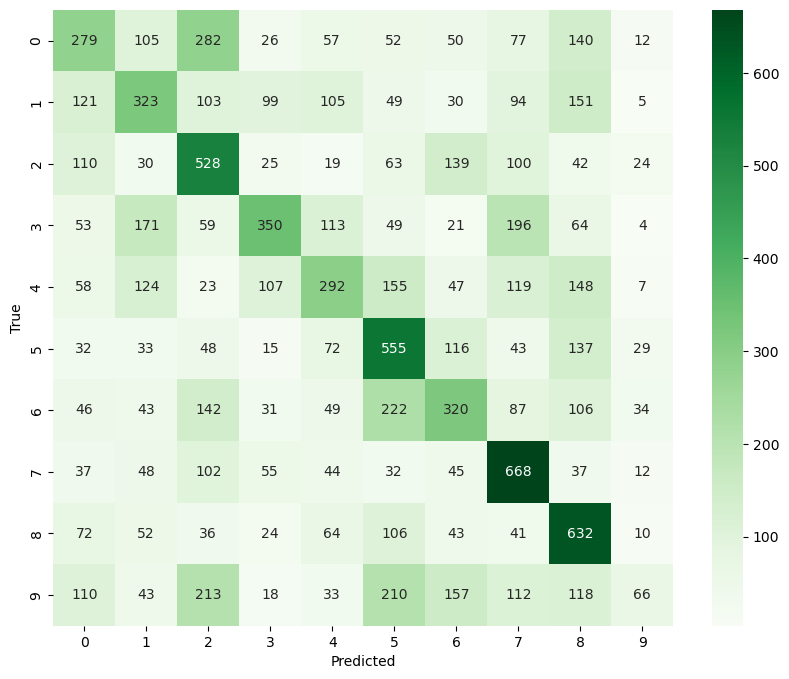

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_true=y_test,y_pred=predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cf, annot=True, cmap="Greens", fmt='g')  # fmt='g' suppresses scientific notation
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
#errors when the true y is thriller (our model say crime, horror, mystery)